 # **H1-B Visa Approval Prediction** 

# Task 2: Feature engineering and model building

## By- Avani Laad (Team B)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/HP/Desktop/.ipynb_checkpoints/H1B/H-1B_Disclosure_Data_FY2019_new.csv")
data

,Unnamed: 0,CASE_STATUS,JOB_TITLE,SOC_CODE,SOC_TITLE,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,...,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,79,CERTIFIED,CREATIVE AGENCY PARTNER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,...,1.0,0.0,0.0,0.0,Y,Y,N,214230.00,Year,1.0
1,122,CERTIFIED,"CREATIVE DIRECTOR, INSTAGRAM",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,FACEBOOK INC.,N,Y,518112.0,...,0.0,0.0,0.0,0.0,Y,Y,N,178746.72,Year,1.0
2,142,CERTIFIED,COMMUNICATIONS PLANNING MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,...,0.0,0.0,0.0,0.0,Y,Y,N,132007.79,Year,1.0
3,163,CERTIFIED,"PRODUCT MARKETING MANAGER, GAMES",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,...,0.0,0.0,0.0,0.0,Y,Y,N,140000.00,Year,1.0
4,182,CERTIFIED,MARKETING COMMUNICATIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,...,0.0,0.0,0.0,0.0,Y,Y,N,159022.85,Year,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209493,664352,CERTIFIED,MAINTENANCE,49-9098,"HELPERS--INSTALLATION, MAINTENANCE, AND REPAIR...",H-1B,"MID-VALLEY GEO-THERMAL, INC.",N,N,238220.0,...,0.0,0.0,0.0,0.0,Y,N,N,10.48,Hour,1.0
209494,664377,DENIED,KITCHEN CHEF,51-3093,FOOD COOKING MACHINE OPERATORS AND TENDERS,H-1B,YOTO STEAKHOUSE AND SUSHI BAR,N,N,7221.0,...,0.0,0.0,0.0,0.0,Y,Y,N,3158.00,Month,1.0
209495,664424,WITHDRAWN,B747 FIRST OFFICER,53-2011,"AIRLINE PILOTS, COPILOTS, AND FLIGHT ENGINEERS",H-1B,NATIONAL AIR CARGO GROUP INC.,N,N,481211.0,...,0.0,0.0,1.0,0.0,Y,Y,N,50000.00,Year,1.0
209496,664567,CERTIFIED,PILOT,53-2012,COMMERCIAL PILOTS,H-1B,MAINE AVIATION CORPORATION,N,N,481211.0,...,0.0,0.0,0.0,0.0,Y,Y,N,109820.00,Year,1.0


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,CASE_STATUS,JOB_TITLE,SOC_CODE,SOC_TITLE,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,CERTIFIED,CREATIVE AGENCY PARTNER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,1.0,0.0,0.0,0.0,Y,Y,N,214230.00,Year,1.0
1,CERTIFIED,"CREATIVE DIRECTOR, INSTAGRAM",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,FACEBOOK INC.,N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,178746.72,Year,1.0
2,CERTIFIED,COMMUNICATIONS PLANNING MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,132007.79,Year,1.0
3,CERTIFIED,"PRODUCT MARKETING MANAGER, GAMES",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,140000.00,Year,1.0
4,CERTIFIED,MARKETING COMMUNICATIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,1,0.0,0.0,0.0,0.0,Y,Y,N,159022.85,Year,1.0


<AxesSubplot:>

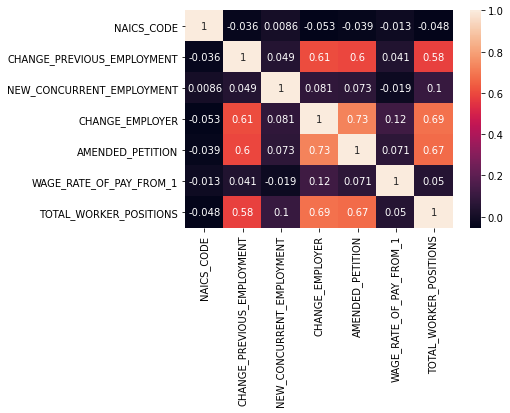

In [4]:
corr=data.corr()
sns.heatmap(corr, annot=True)

In [5]:
data['CASE_STATUS'].value_counts()

CERTIFIED              197881
CERTIFIED-WITHDRAWN      5720
WITHDRAWN                5195
DENIED                    702
Name: CASE_STATUS, dtype: int64

In [6]:
data["CASE_STATUS"].replace(["CERTIFIED-WITHDRAWN"],"CERTIFIED", inplace=True)
data["CASE_STATUS"].replace(["DENIED"],"WITHDRAWN", inplace=True)
data.value_counts(["CASE_STATUS"])

CASE_STATUS
CERTIFIED      203601
WITHDRAWN        5897
dtype: int64

In [7]:
data.isnull().sum()

CASE_STATUS                    0
JOB_TITLE                      0
SOC_CODE                       0
SOC_TITLE                      0
VISA_CLASS                     0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
dtype: int64

In [8]:
data['AGENT_REPRESENTING_EMPLOYER'].value_counts()

N    114013
Y     95485
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [9]:
data['JOB_TITLE'].value_counts()

SOFTWARE DEVELOPER                     19929
SOFTWARE ENGINEER                      13330
SENIOR SYSTEMS ANALYST JC60            11482
TECHNOLOGY LEAD - US - PRACTITIONER     7245
MANAGER JC50                            7105
                                       ...  
ETL DESIGNER                               1
SOFTWARE ENGINEER, PLATFORM                1
FRAUD AND RISK ANALYST 3                   1
ENGINEER SYSTEMS SOFTWARE                  1
STORAGE AREA NETWORKS ENGINEER             1
Name: JOB_TITLE, Length: 17346, dtype: int64

In [10]:
data['NAICS_CODE'].value_counts()

541511.0    134922
541512.0     35798
5416.0        9142
541519.0      7033
541330.0      4220
             ...  
237310.0         1
23821.0          1
511110.0         1
61111.0          1
5413.0           1
Name: NAICS_CODE, Length: 183, dtype: int64

In [11]:
data

,CASE_STATUS,JOB_TITLE,SOC_CODE,SOC_TITLE,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,CERTIFIED,CREATIVE AGENCY PARTNER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,1.0,0.0,0.0,0.0,Y,Y,N,214230.00,Year,1.0
1,CERTIFIED,"CREATIVE DIRECTOR, INSTAGRAM",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,FACEBOOK INC.,N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,178746.72,Year,1.0
2,CERTIFIED,COMMUNICATIONS PLANNING MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,132007.79,Year,1.0
3,CERTIFIED,"PRODUCT MARKETING MANAGER, GAMES",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,0.0,Y,Y,N,140000.00,Year,1.0
4,CERTIFIED,MARKETING COMMUNICATIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"FACEBOOK, INC.",N,Y,518112.0,1,0.0,0.0,0.0,0.0,Y,Y,N,159022.85,Year,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209493,CERTIFIED,MAINTENANCE,49-9098,"HELPERS--INSTALLATION, MAINTENANCE, AND REPAIR...",H-1B,"MID-VALLEY GEO-THERMAL, INC.",N,N,238220.0,0.0,0.0,0.0,0.0,0.0,Y,N,N,10.48,Hour,1.0
209494,WITHDRAWN,KITCHEN CHEF,51-3093,FOOD COOKING MACHINE OPERATORS AND TENDERS,H-1B,YOTO STEAKHOUSE AND SUSHI BAR,N,N,7221.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,3158.00,Month,1.0
209495,WITHDRAWN,B747 FIRST OFFICER,53-2011,"AIRLINE PILOTS, COPILOTS, AND FLIGHT ENGINEERS",H-1B,NATIONAL AIR CARGO GROUP INC.,N,N,481211.0,0.0,0.0,0.0,1.0,0.0,Y,Y,N,50000.00,Year,1.0
209496,CERTIFIED,PILOT,53-2012,COMMERCIAL PILOTS,H-1B,MAINE AVIATION CORPORATION,N,N,481211.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,109820.00,Year,1.0


In [12]:
data.SOC_TITLE.str.split(" ").map(lambda x: x[0])

0                    ADVERTISING
1                    ADVERTISING
2                    ADVERTISING
3                    ADVERTISING
4                    ADVERTISING
                   ...          
209493    HELPERS--INSTALLATION,
209494                      FOOD
209495                   AIRLINE
209496                COMMERCIAL
209497                     HEAVY
Name: SOC_TITLE, Length: 209498, dtype: object

In [13]:
data['SOC_TITLE'].value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS     81826
COMPUTER SYSTEMS ANALYST              36744
COMPUTER OCCUPATIONS, ALL OTHER       26207
COMPUTER SYSTEMS ANALYSTS             12356
COMPUTER PROGRAMMERS                  10187
                                      ...  
CIVIL ENGINEERS, R&D                      1
SOLUTION CONSULTANT                       1
CUMPUTER OCCUPATIONS, ALL OTHER           1
COMMERCIAL AND INDUSTRIAL DESIGNER        1
ACTUARIES                                 1
Name: SOC_TITLE, Length: 266, dtype: int64

In [14]:
data.drop(['SOC_CODE','VISA_CLASS','JOB_TITLE','AMENDED_PETITION','WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','WILLFUL_VIOLATOR'], axis=1, inplace=True)

In [15]:
data

,CASE_STATUS,SOC_TITLE,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,H-1B_DEPENDENT,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM_1
0,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,"FACEBOOK, INC.",N,Y,518112.0,0,1.0,0.0,0.0,Y,Y,214230.00
1,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,FACEBOOK INC.,N,Y,518112.0,0,0.0,0.0,0.0,Y,Y,178746.72
2,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,Y,Y,132007.79
3,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,"FACEBOOK, INC.",N,Y,518112.0,0,0.0,0.0,0.0,Y,Y,140000.00
4,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,"FACEBOOK, INC.",N,Y,518112.0,1,0.0,0.0,0.0,Y,Y,159022.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209493,CERTIFIED,"HELPERS--INSTALLATION, MAINTENANCE, AND REPAIR...","MID-VALLEY GEO-THERMAL, INC.",N,N,238220.0,0.0,0.0,0.0,0.0,Y,N,10.48
209494,WITHDRAWN,FOOD COOKING MACHINE OPERATORS AND TENDERS,YOTO STEAKHOUSE AND SUSHI BAR,N,N,7221.0,0.0,0.0,0.0,0.0,Y,Y,3158.00
209495,WITHDRAWN,"AIRLINE PILOTS, COPILOTS, AND FLIGHT ENGINEERS",NATIONAL AIR CARGO GROUP INC.,N,N,481211.0,0.0,0.0,0.0,1.0,Y,Y,50000.00
209496,CERTIFIED,COMMERCIAL PILOTS,MAINE AVIATION CORPORATION,N,N,481211.0,0.0,0.0,0.0,0.0,Y,Y,109820.00


In [16]:
data['EMPLOYER_NAME'].value_counts()

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    25011
INFOSYS LIMITED                           20305
TATA CONSULTANCY SERVICES LIMITED         10543
CAPGEMINI AMERICA INC                      7349
HCL AMERICA, INC.                          4412
                                          ...  
PRODIGY TECHNOLOGIES, INC                     1
AGRANEE TECH, INC.                            1
ILOGIK INC                                    1
CONFLUX SYSTEMS INC.                          1
INFOVISION, INC,                              1
Name: EMPLOYER_NAME, Length: 4634, dtype: int64

In [17]:
warnings.filterwarnings("ignore")

data['NEW_EMPLOYER'] = np.nan
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 'university'
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

In [18]:
data['NEW_EMPLOYER'].value_counts()

non university    209466
university            32
Name: NEW_EMPLOYER, dtype: int64

In [19]:
data.drop(['EMPLOYER_NAME', 'H-1B_DEPENDENT', 'SUPPORT_H1B'], axis=1, inplace=True)

In [20]:
data

,CASE_STATUS,SOC_TITLE,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER
0,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,N,Y,518112.0,0,1.0,0.0,0.0,214230.00,non university
1,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,N,Y,518112.0,0,0.0,0.0,0.0,178746.72,non university
2,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,N,Y,518112.0,0,0.0,0.0,0.0,132007.79,non university
3,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,N,Y,518112.0,0,0.0,0.0,0.0,140000.00,non university
4,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGERS,N,Y,518112.0,1,0.0,0.0,0.0,159022.85,non university
...,...,...,...,...,...,...,...,...,...,...,...
209493,CERTIFIED,"HELPERS--INSTALLATION, MAINTENANCE, AND REPAIR...",N,N,238220.0,0.0,0.0,0.0,0.0,10.48,non university
209494,WITHDRAWN,FOOD COOKING MACHINE OPERATORS AND TENDERS,N,N,7221.0,0.0,0.0,0.0,0.0,3158.00,non university
209495,WITHDRAWN,"AIRLINE PILOTS, COPILOTS, AND FLIGHT ENGINEERS",N,N,481211.0,0.0,0.0,0.0,1.0,50000.00,non university
209496,CERTIFIED,COMMERCIAL PILOTS,N,N,481211.0,0.0,0.0,0.0,0.0,109820.00,non university


In [21]:
warnings.filterwarnings("ignore")
data['SOC_TITLE'] = data['SOC_TITLE'].str.lower()

In [22]:
data['SOC_TITLE'].value_counts()

software developers, applications              81826
computer systems analyst                       36744
computer occupations, all other                26207
computer systems analysts                      12356
computer programmers                           10187
                                               ...  
instructional coordinators                         1
software develper, applications                    1
production, planning, and expediting clerks        1
software devvelopers, applications                 1
recreational therapists                            1
Name: SOC_TITLE, Length: 266, dtype: int64

In [23]:
import sys
data['SOC_NAME1'] = 'others'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('it','software')] = 'software'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('database','computer')] = 'software'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('web development','programmer')] = 'software'

data['SOC_NAME1'][data['SOC_TITLE'].str.contains('chief','managers')] = 'management'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('public relation','manage')] = 'management'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('management','operation')] = 'management'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('plan','executive')] = 'management'

data['SOC_NAME1'][data['SOC_TITLE'].str.contains('forencsic','health')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('medical','doctor')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('physician','dentist')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('Physical Therapists','biologi')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('psychiatr','chemist')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('surgeon','nurse')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('chemist','physicist')] = 'medical'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('biology','scientist')] = 'medical'

data['SOC_NAME1'][data['SOC_TITLE'].str.contains('mechanical')] = 'mechanical'

data['SOC_NAME1'][data['SOC_TITLE'].str.contains('advertis','marketing')] = 'business and marketing'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('promotion','market research')] = 'business and marketing'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('business','business analyst')] = 'business and marketing'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('business systems analyst','financial')] = 'business and marketing'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('accountant','finance')] = 'business and marketing'

data['SOC_NAME1'][data['SOC_TITLE'].str.contains('teachers','linguist')] = 'education'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('professor','Teach')] = 'education'
data['SOC_NAME1'][data['SOC_TITLE'].str.contains('school principal')] = 'education'

In [24]:
data['SOC_NAME1'].value_counts()

others                    194508
software                    9154
management                  2840
mechanical                  2158
medical                      449
business and marketing       260
education                    129
Name: SOC_NAME1, dtype: int64

In [25]:
data.drop(['SOC_TITLE'], axis=1, inplace=True)

In [26]:
data

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
0,CERTIFIED,N,Y,518112.0,0,1.0,0.0,0.0,214230.00,non university,business and marketing
1,CERTIFIED,N,Y,518112.0,0,0.0,0.0,0.0,178746.72,non university,business and marketing
2,CERTIFIED,N,Y,518112.0,0,0.0,0.0,0.0,132007.79,non university,business and marketing
3,CERTIFIED,N,Y,518112.0,0,0.0,0.0,0.0,140000.00,non university,business and marketing
4,CERTIFIED,N,Y,518112.0,1,0.0,0.0,0.0,159022.85,non university,business and marketing
...,...,...,...,...,...,...,...,...,...,...,...
209493,CERTIFIED,N,N,238220.0,0.0,0.0,0.0,0.0,10.48,non university,others
209494,WITHDRAWN,N,N,7221.0,0.0,0.0,0.0,0.0,3158.00,non university,others
209495,WITHDRAWN,N,N,481211.0,0.0,0.0,0.0,1.0,50000.00,non university,others
209496,CERTIFIED,N,N,481211.0,0.0,0.0,0.0,0.0,109820.00,non university,others


In [27]:
data['CONTINUED_EMPLOYMENT'].value_counts()

0     111008
0      46542
1      32421
1      18814
5        260
2        102
10        80
3         68
5         63
3         62
2         35
6         12
10        10
4          7
4          6
B          3
25         2
20         2
15         1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [28]:
data.drop(['CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER'], axis=1, inplace=True)

In [29]:
data

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
0,CERTIFIED,N,Y,518112.0,214230.00,non university,business and marketing
1,CERTIFIED,N,Y,518112.0,178746.72,non university,business and marketing
2,CERTIFIED,N,Y,518112.0,132007.79,non university,business and marketing
3,CERTIFIED,N,Y,518112.0,140000.00,non university,business and marketing
4,CERTIFIED,N,Y,518112.0,159022.85,non university,business and marketing
...,...,...,...,...,...,...,...
209493,CERTIFIED,N,N,238220.0,10.48,non university,others
209494,WITHDRAWN,N,N,7221.0,3158.00,non university,others
209495,WITHDRAWN,N,N,481211.0,50000.00,non university,others
209496,CERTIFIED,N,N,481211.0,109820.00,non university,others


## Model building

In [30]:
data['CASE_STATUS']=data['CASE_STATUS'].replace(['CERTIFIED'], 1)
data['CASE_STATUS']=data['CASE_STATUS'].replace(['WITHDRAWN'], 0)
data['CASE_STATUS'].value_counts()

1    203601
0      5897
Name: CASE_STATUS, dtype: int64

In [31]:
#converting values to integers for Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

data['CASE_STATUS']=pd.to_numeric(data['CASE_STATUS'])
data['NAICS_CODE']=pd.to_numeric(data['NAICS_CODE'])
data['WAGE_RATE_OF_PAY_FROM_1']=pd.to_numeric(data['WAGE_RATE_OF_PAY_FROM_1'])

data.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
0,1,N,Y,518112.0,214230.00,non university,business and marketing
1,1,N,Y,518112.0,178746.72,non university,business and marketing
2,1,N,Y,518112.0,132007.79,non university,business and marketing
3,1,N,Y,518112.0,140000.00,non university,business and marketing
4,1,N,Y,518112.0,159022.85,non university,business and marketing


In [32]:
from sklearn.preprocessing import LabelEncoder

data['SECONDARY_ENTITY_1']=LabelEncoder().fit_transform(data['SECONDARY_ENTITY_1'])
data['AGENT_REPRESENTING_EMPLOYER']=LabelEncoder().fit_transform(data['AGENT_REPRESENTING_EMPLOYER'])
data['NEW_EMPLOYER']=LabelEncoder().fit_transform(data['NEW_EMPLOYER'])
data['SOC_NAME1']=LabelEncoder().fit_transform(data['SOC_NAME1'])
data.head(10)

data.head(10)

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
0,1,0,1,518112.0,214230.00,0,0
1,1,0,1,518112.0,178746.72,0,0
2,1,0,1,518112.0,132007.79,0,0
3,1,0,1,518112.0,140000.00,0,0
4,1,0,1,518112.0,159022.85,0,0
5,1,0,1,518112.0,178746.72,0,0
6,1,0,1,62151.0,77542.00,0,0
7,1,0,1,518112.0,172093.59,0,0
8,1,0,1,454111.0,90000.00,0,0
9,0,0,1,541511.0,171150.00,0,5


In [33]:
Y_train = pd.DataFrame(data = data.iloc[:, 0].values, columns = ['target'])
data= data.drop(["CASE_STATUS"],axis=1)
data.head() 

,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
0,0,1,518112.0,214230.00,0,0
1,0,1,518112.0,178746.72,0,0
2,0,1,518112.0,132007.79,0,0
3,0,1,518112.0,140000.00,0,0
4,0,1,518112.0,159022.85,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.head()

,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,WAGE_RATE_OF_PAY_FROM_1,NEW_EMPLOYER,SOC_NAME1
204681,1,1,5415.0,72900.0,0,3
145940,1,0,541511.0,83346.0,0,5
152229,0,1,336111.0,120000.0,0,5
100209,0,0,541990.0,81016.0,0,5
38504,0,0,541512.0,105269.0,0,5


In [35]:
# normalising the data

from sklearn.preprocessing import MinMaxScaler
data_scaler=MinMaxScaler()
X_train=data_scaler.fit_transform(X_train)
X_test=data_scaler.fit_transform(X_test)

In [37]:
# decision tree classifier

from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(max_depth=5,random_state=42)
decision_tree.fit(X_train,y_train)

prediction=decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9716467780429594

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print('\n',classification_report(y_test, prediction))

[[    1  1159]
 [   29 40711]]

               precision    recall  f1-score   support

           0       0.03      0.00      0.00      1160
           1       0.97      1.00      0.99     40740

    accuracy                           0.97     41900
   macro avg       0.50      0.50      0.49     41900
weighted avg       0.95      0.97      0.96     41900



In [39]:
# naive bayes classifier
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train,y_train)  

prediction=classifier.predict(X_test)
classifier.score(X_test,y_test)

0.7078281622911694

In [40]:
print(confusion_matrix(y_test, prediction))
print('\n',classification_report(y_test, prediction))

[[  353   807]
 [11435 29305]]

               precision    recall  f1-score   support

           0       0.03      0.30      0.05      1160
           1       0.97      0.72      0.83     40740

    accuracy                           0.71     41900
   macro avg       0.50      0.51      0.44     41900
weighted avg       0.95      0.71      0.81     41900



In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.5118139843921927